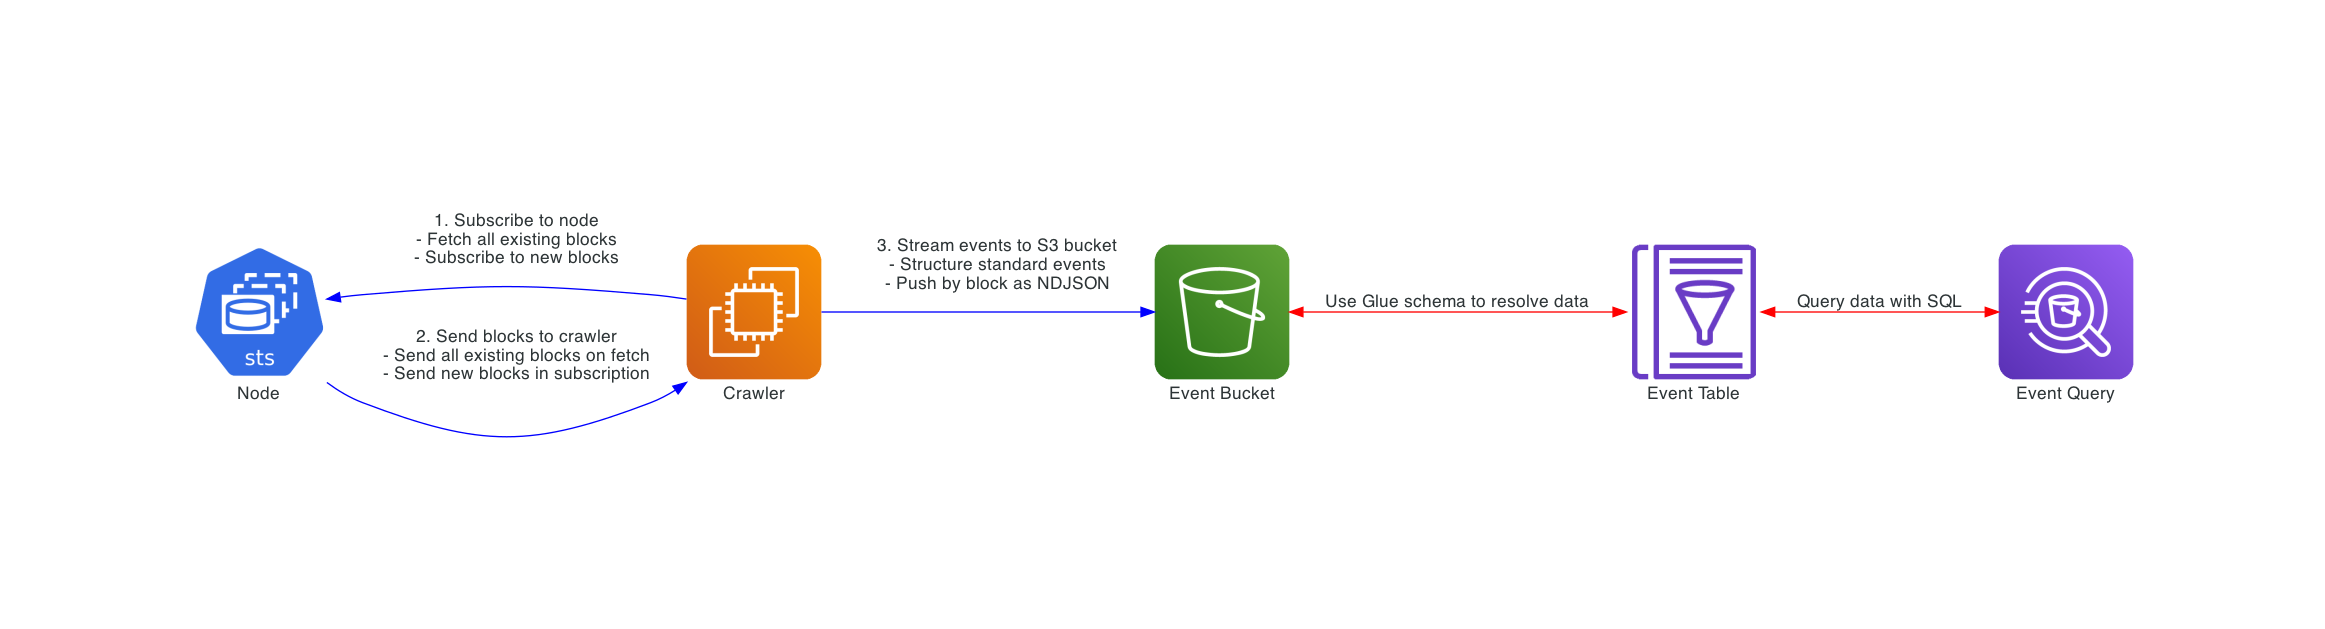

In [6]:
from diagrams import Diagram, Edge
from diagrams.k8s.compute import StatefulSet
from diagrams.aws.compute import EC2
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Athena, GlueDataCatalog

graph_attr = {
    "splines": "spline",
    "concentrate": "true",
}

edge_attr = {
    "nojustify": "true",
}

with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, show=False, filename="content/diagrams/system") as diag:

    node = StatefulSet("Node")
    crawler = EC2("Crawler")

    edge_1 = """
    1. Subscribe to node
    - Fetch all existing blocks
    - Subscribe to new blocks
    """
    edge_2 = """
    2. Send blocks to crawler
    - Send all existing blocks on fetch
    - Send new blocks in subscription
    """

    node << Edge(label=edge_1, color="blue") << crawler
    node >> Edge(label=edge_2, color="blue") >> crawler
    
    event_bucket = S3("Event Bucket")
    edge_3 = """
    3. Stream events to S3 bucket
    - Structure standard events
    - Push by block as NDJSON
    """

    crawler >> Edge(label=edge_3, color="blue") >> event_bucket

    event_bucket >> \
    Edge(label="Use Glue schema to resolve data", color="red") << \
    GlueDataCatalog("Event Table") >> \
    Edge(label="Query data with SQL", color="red") << \
    Athena("Event Query")
diag